In [ ]:
#Importing neccesary packages
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load data
heart=pd.read_csv("/content/Heart.csv")

In [ ]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
heart.shape

(303, 15)

Data visualization

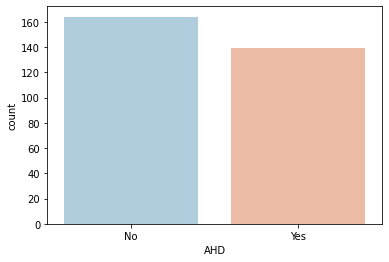

In [ ]:
sns.countplot(x="AHD",data=heart,palette="RdBu_r")

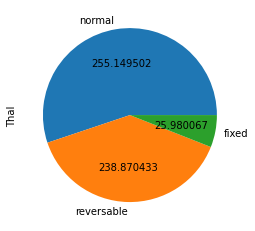

In [ ]:
heart["Thal"].value_counts().plot(kind="pie",autopct="2%f")

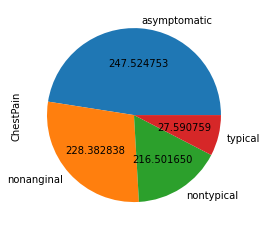

In [ ]:
heart["ChestPain"].value_counts().plot(kind="pie",autopct="2%f")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


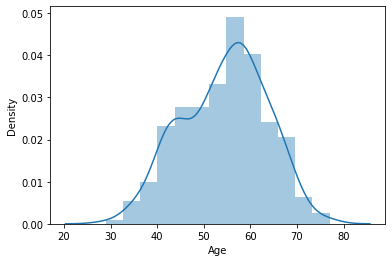

In [ ]:
sns.distplot(heart["Age"])

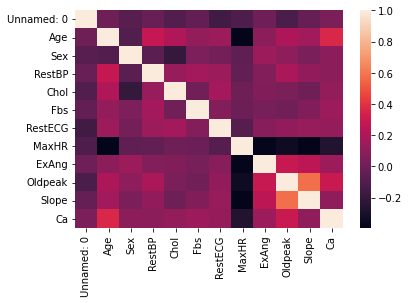

In [ ]:
sns.heatmap(heart.corr())

Data Cleaning

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [ ]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,303.0,152.000000,87.612784,1.0,76.5,152.0,227.5,303.0
Age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
RestBP,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
Fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
RestECG,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
MaxHR,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
ExAng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
heart.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [ ]:
heart['Ca'].fillna(0, inplace=True)

In [ ]:
heart['Thal'].fillna(0, inplace=True)

In [ ]:
heart.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

In [ ]:
heart.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [ ]:
heart.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

In [ ]:
heart.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [ ]:
heart=pd.get_dummies(heart,columns=["ChestPain","Thal"],drop_first=True)

In [ ]:
heart.dtypes

Unnamed: 0                int64
Age                       int64
Sex                       int64
RestBP                    int64
Chol                      int64
Fbs                       int64
RestECG                   int64
MaxHR                     int64
ExAng                     int64
Oldpeak                 float64
Slope                     int64
Ca                      float64
AHD                      object
ChestPain_nonanginal      uint8
ChestPain_nontypical      uint8
ChestPain_typical         uint8
Thal_fixed                uint8
Thal_normal               uint8
Thal_reversable           uint8
dtype: object

In [ ]:
heart.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,No,0,0,1,1,0,0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes,0,0,0,0,1,0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,Yes,0,0,0,0,0,1
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0,No,1,0,0,0,1,0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0,No,0,1,0,0,1,0


In [ ]:
df1=heart.drop(["Unnamed: 0",],axis=1)

In [ ]:
df1['AHD'] = 1*(df1['AHD'] == "Yes")

In [ ]:
df1["AHD"].value_counts()

0    164
1    139
Name: AHD, dtype: int64

In [ ]:
df1.tail()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
298,45,1,110,264,0,0,132,0,1.2,2,0.0,1,0,0,1,0,0,1
299,68,1,144,193,1,0,141,0,3.4,2,2.0,1,0,0,0,0,0,1
300,57,1,130,131,0,0,115,1,1.2,2,1.0,1,0,0,0,0,0,1
301,57,0,130,236,0,2,174,0,0.0,2,1.0,1,0,1,0,0,1,0
302,38,1,138,175,0,0,173,0,0.0,1,0.0,0,1,0,0,0,1,0


In [ ]:
df1.shape

(303, 18)

In [ ]:
df1.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0


In [ ]:
# Define X and y.
X = df1.drop('AHD', axis = 'columns')
y = df1['AHD']

In [ ]:
X

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,0,132,0,1.2,2,0.0,0,0,1,0,0,1
299,68,1,144,193,1,0,141,0,3.4,2,2.0,0,0,0,0,0,1
300,57,1,130,131,0,0,115,1,1.2,2,1.0,0,0,0,0,0,1
301,57,0,130,236,0,2,174,0,0.0,2,1.0,0,1,0,0,1,0


In [ ]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: AHD, Length: 303, dtype: int64

In [ ]:
y.value_counts(normalize = True)

0    0.541254
1    0.458746
Name: AHD, dtype: float64

In [ ]:
# Split data into training and testing sets.
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,test_size=0.2,
                                                random_state = 42,
                                                stratify = y)

In [ ]:
X_train

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
180,48,1,124,274,0,2,166,0,0.5,2,0.0,0,0,0,0,0,1
208,55,1,130,262,0,0,155,0,0.0,1,0.0,0,1,0,0,1,0
167,54,0,132,288,1,2,159,1,0.0,1,1.0,0,1,0,0,1,0
105,54,1,108,309,0,0,156,0,0.0,1,0.0,0,1,0,0,0,1
297,57,0,140,241,0,0,123,1,0.2,2,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,62,0,140,394,0,2,157,0,1.2,2,0.0,0,0,0,0,1,0
136,70,1,145,174,0,0,125,1,2.6,3,0.0,0,0,0,0,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,0,1
189,69,1,140,254,0,2,146,0,2.0,2,3.0,1,0,0,0,0,1


In [ ]:
y_train

180    1
208    0
167    0
105    0
297    1
      ..
173    0
136    1
2      1
189    1
16     1
Name: AHD, Length: 242, dtype: int64

In [ ]:
#Important Parameters
#base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.

#n_estimators: Number of weak learners to train iteratively.

#learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

In [ ]:
# Create adaboost classifer object
AdaModel = AdaBoostClassifier(n_estimators=100,
                         learning_rate=10)
# Train Adaboost Classifer
model = AdaModel.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
#Important Parameters

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.29508196721311475


In [ ]:
# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=10)

In [ ]:
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7377049180327869
